In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]

In [3]:
topics = np.array([[-1, 1]])

In [4]:
varied_param = 'influencer_attention_bound'
varied_param_legend_label = 'Influencer Attention Bound'
varied_param_x_label = 'Influencer Attention Bound'

In [5]:
num_influencers = 1
num_agents = 10

bounds = list(np.linspace(1, 100, 10))
varied_param_values = bounds

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=bounds,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.007793875003699213s): nit=3, nfev=10, njev=5.
Optimizing producer 1
Optimization succeeded (overall 0.004776750050950795s): nit=3, nfev=10, njev=5.
Optimizing producer 2
Optimization succeeded (overall 0.003042166994418949s): nit=3, nfev=10, njev=5.
Optimizing producer 3
Optimization succeeded (overall 0.004421124991495162s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.0025330830249004066s): nit=2, nfev=8, njev=4.
Optimizing producer 5
Optimization succeeded (overall 0.002426458988338709s): nit=2, nfev=8, njev=4.
Optimizing producer 6
Optimization succeeded (overall 0.0030171250109560788s): nit=3, nfev=10, njev=5.
Optimizing producer 7
Optimization succee

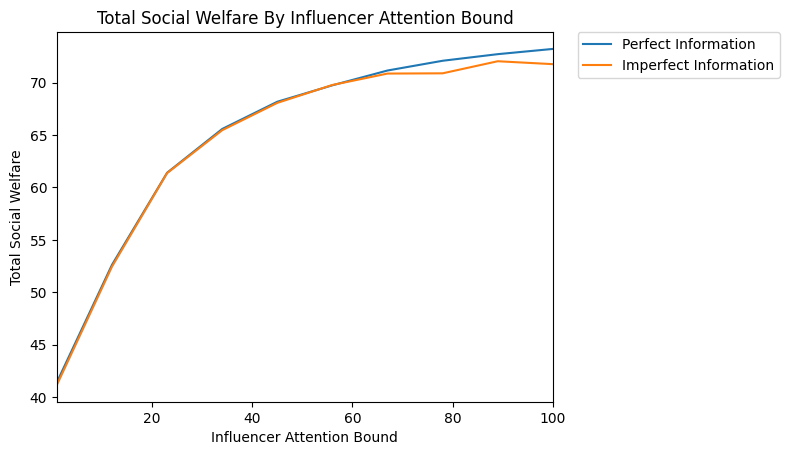

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

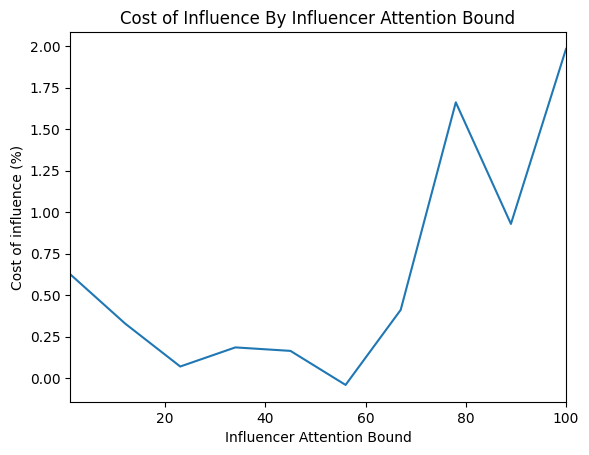

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

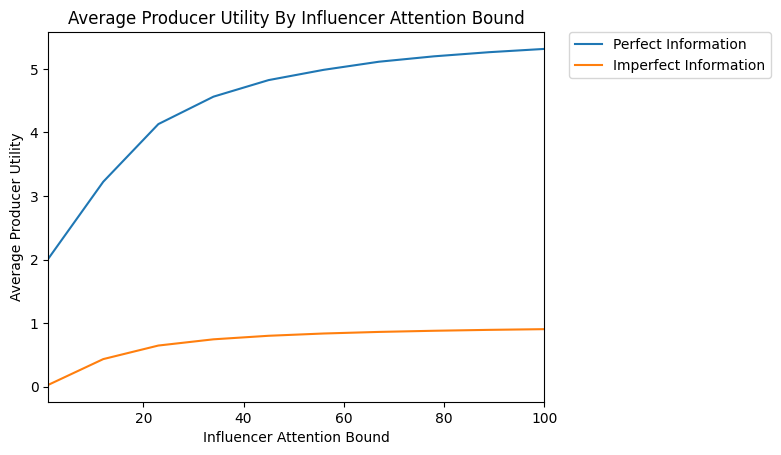

In [9]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

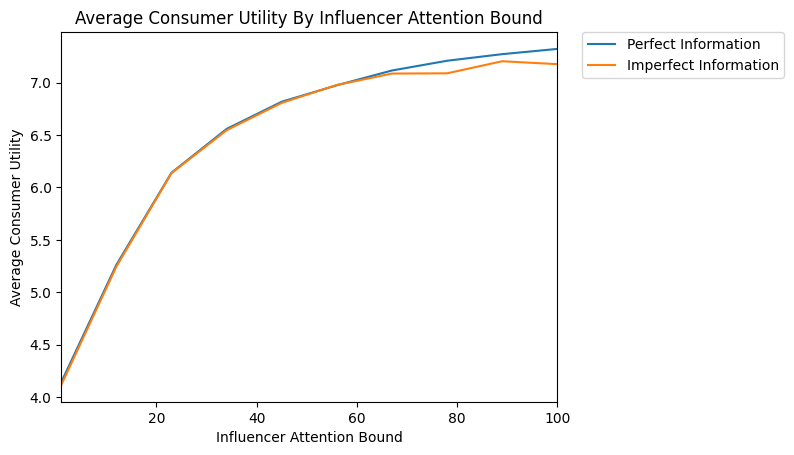

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

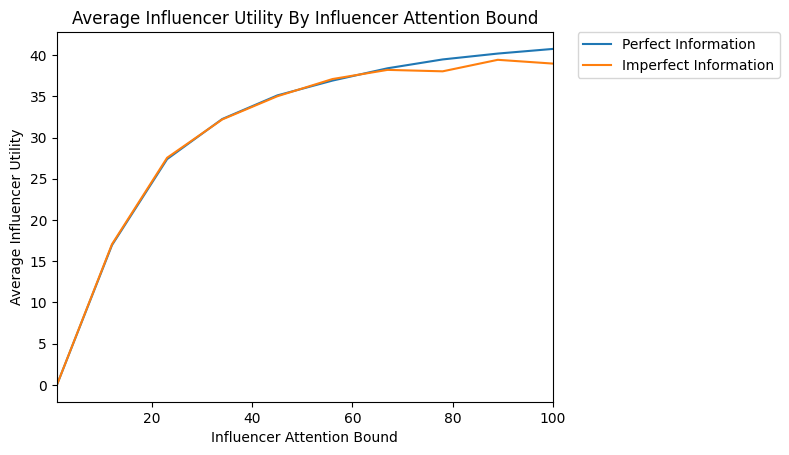

In [11]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

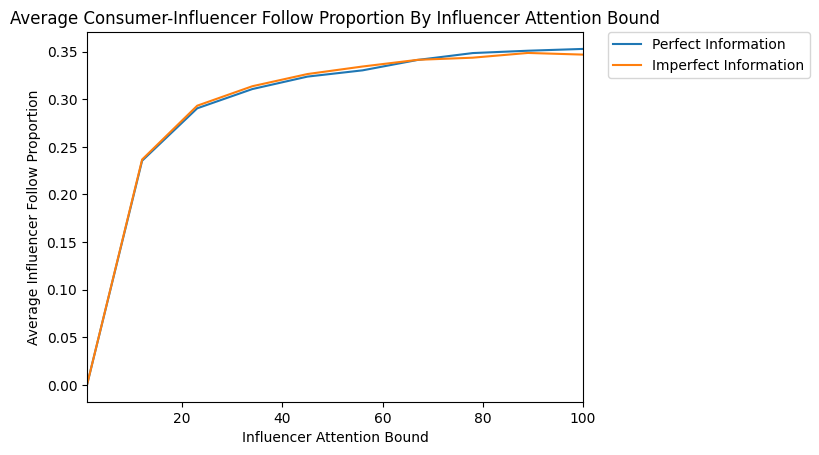

In [12]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

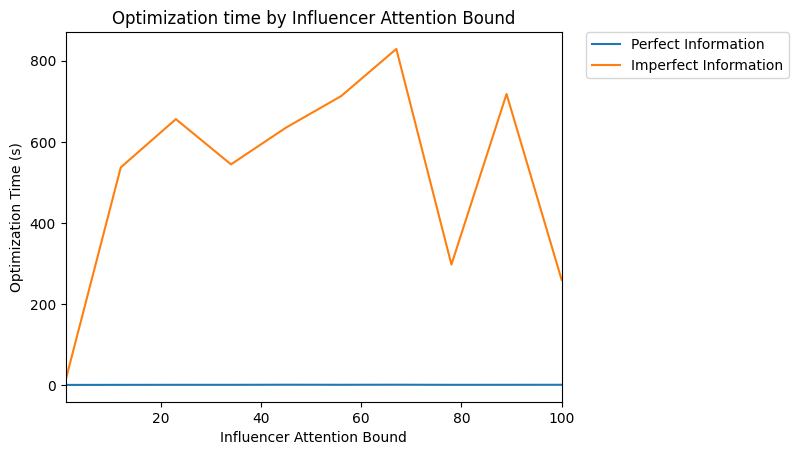

In [13]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

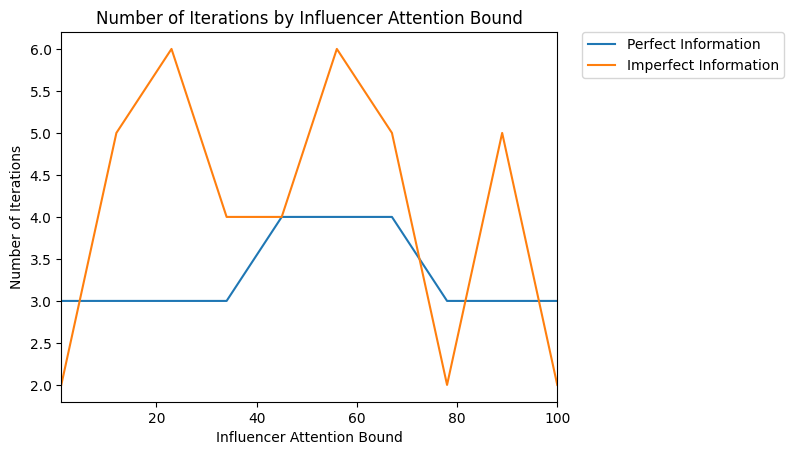

In [14]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

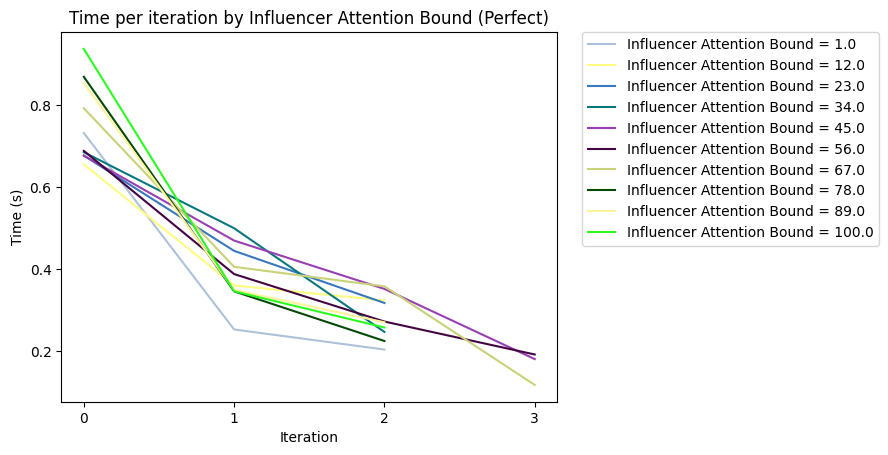

In [15]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

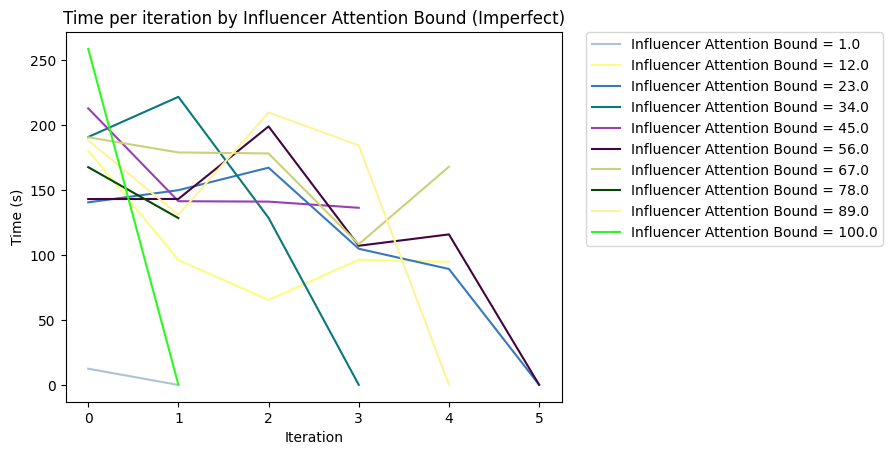

In [16]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

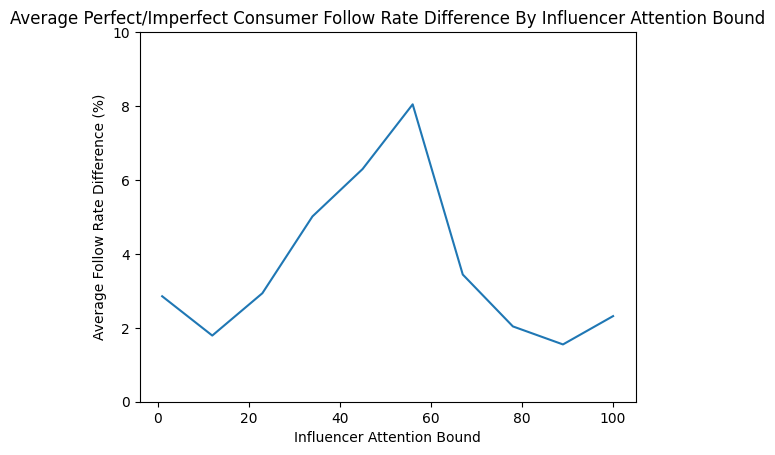

In [17]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.ylim(0, 10)
plt.show()

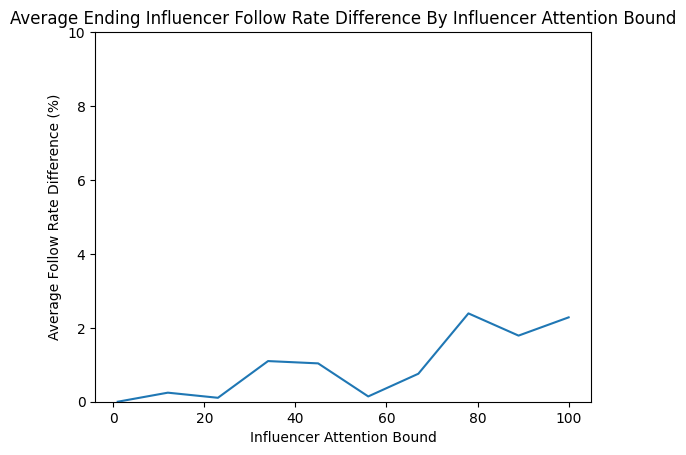

In [18]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.ylim(0, 10)
plt.show()

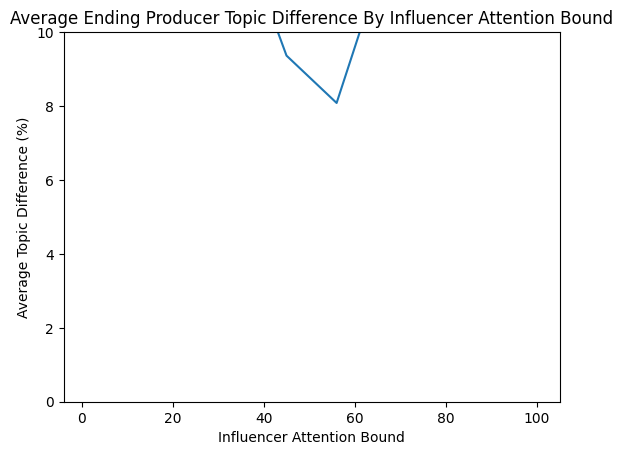

In [19]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
plt.ylim(0, 10)
plt.show()

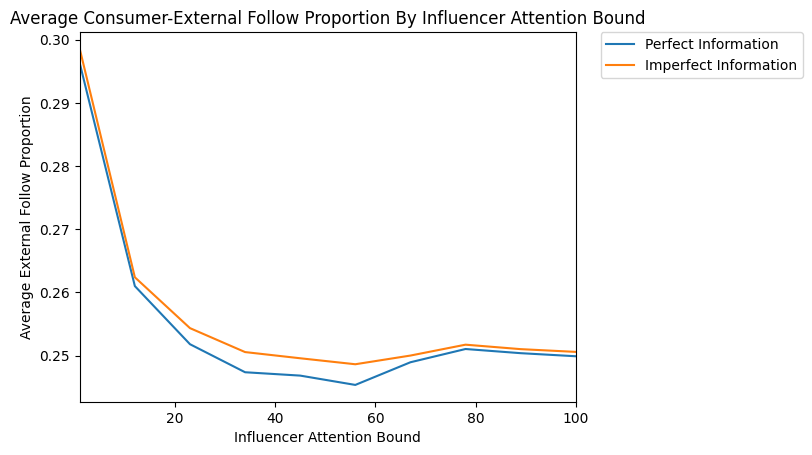

In [20]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

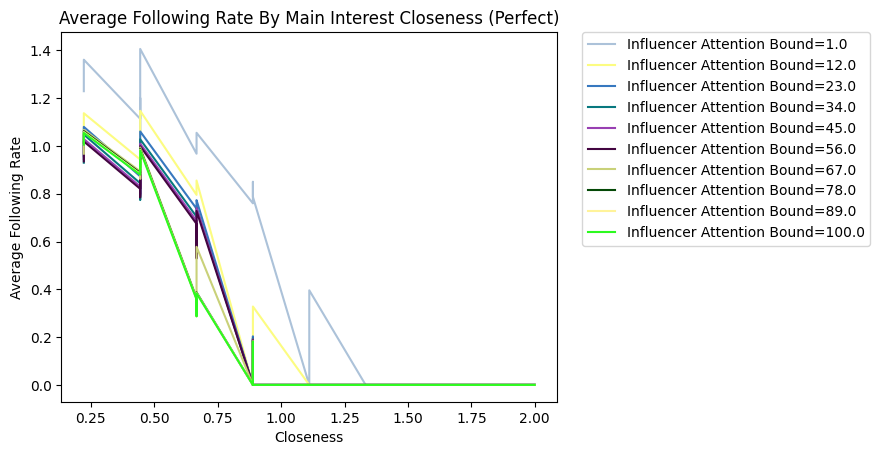

In [21]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

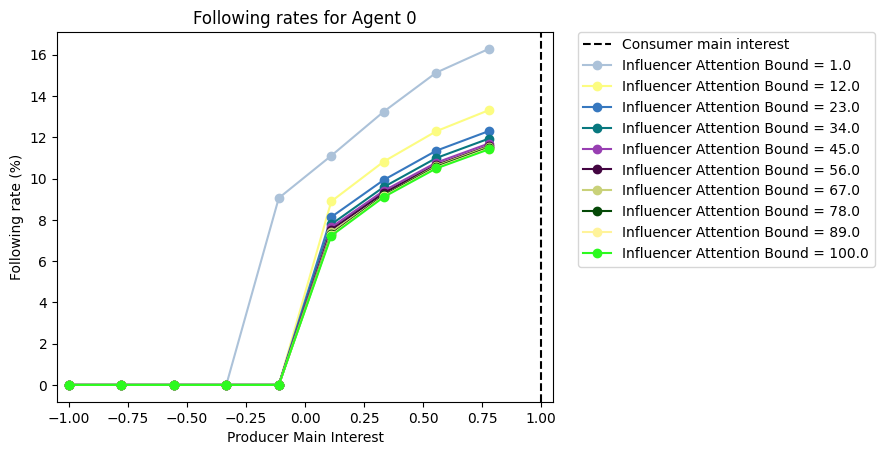

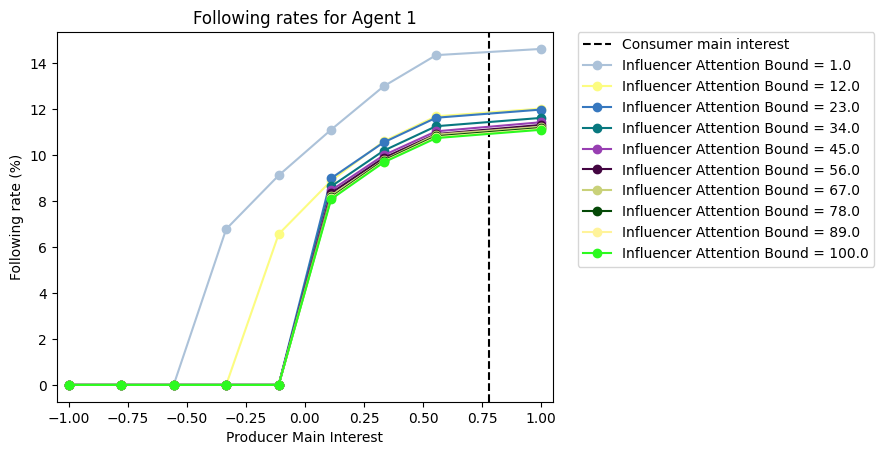

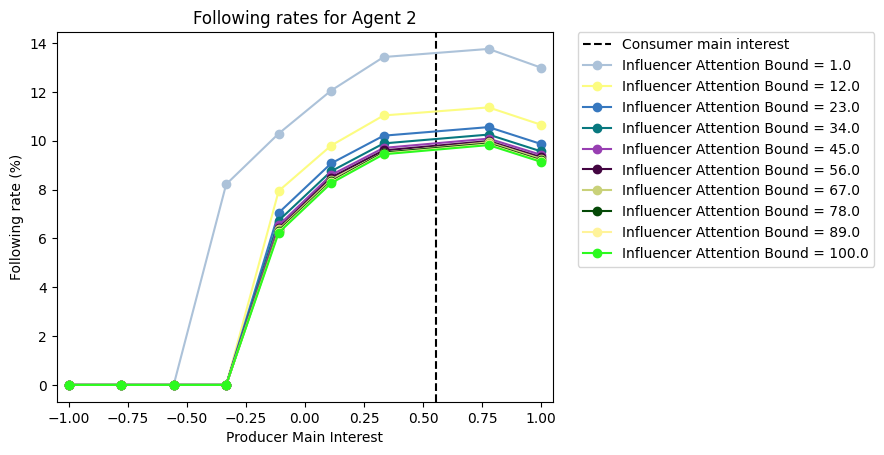

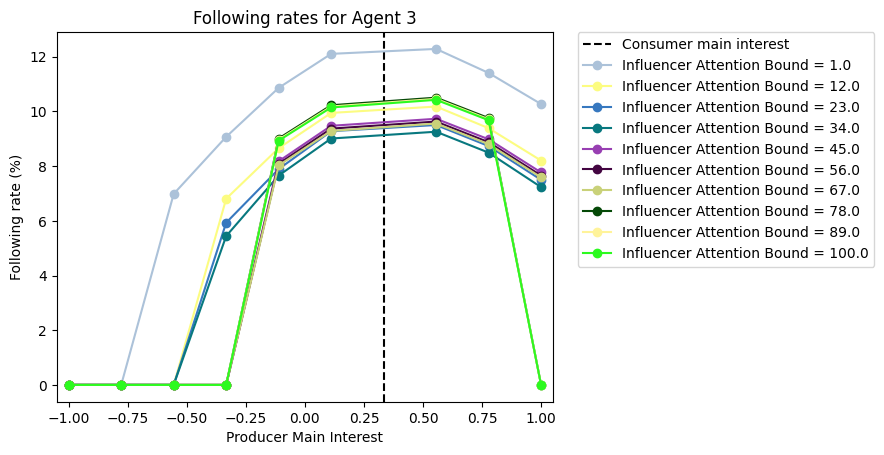

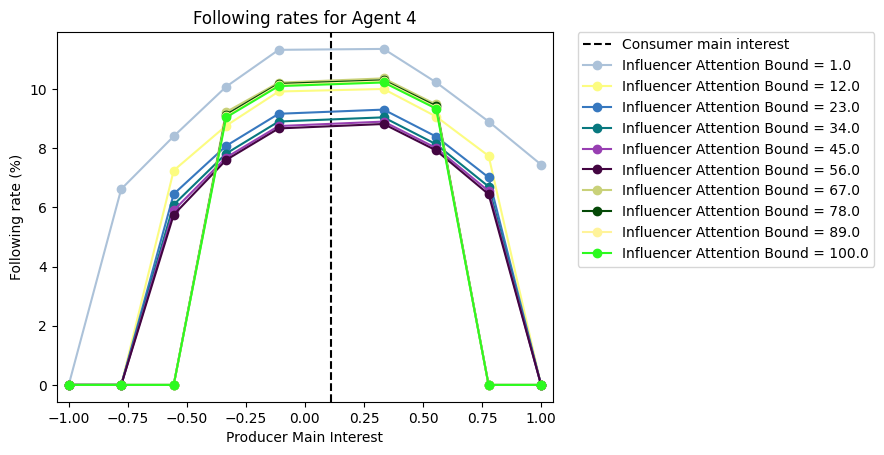

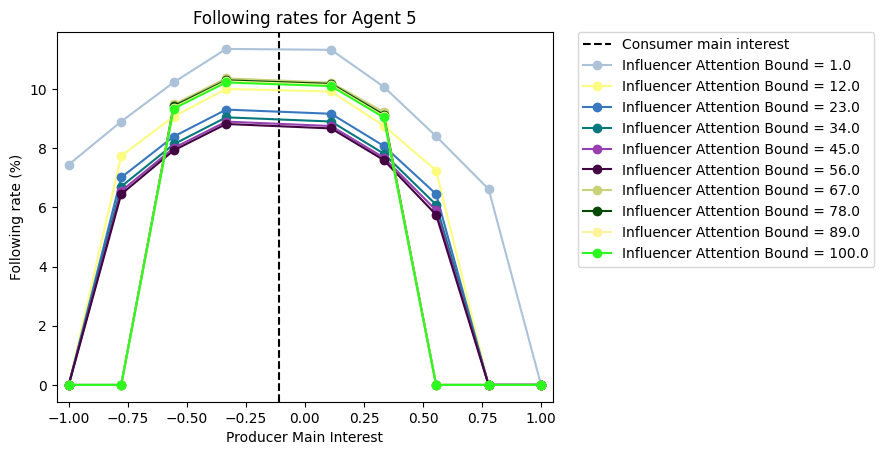

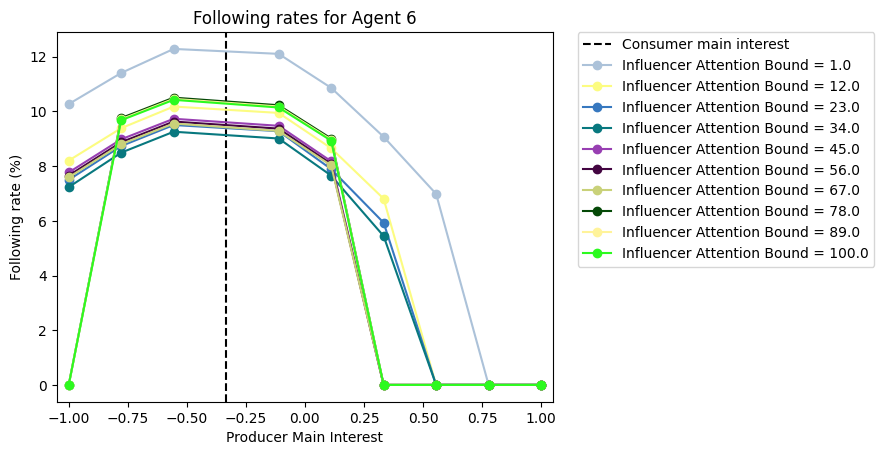

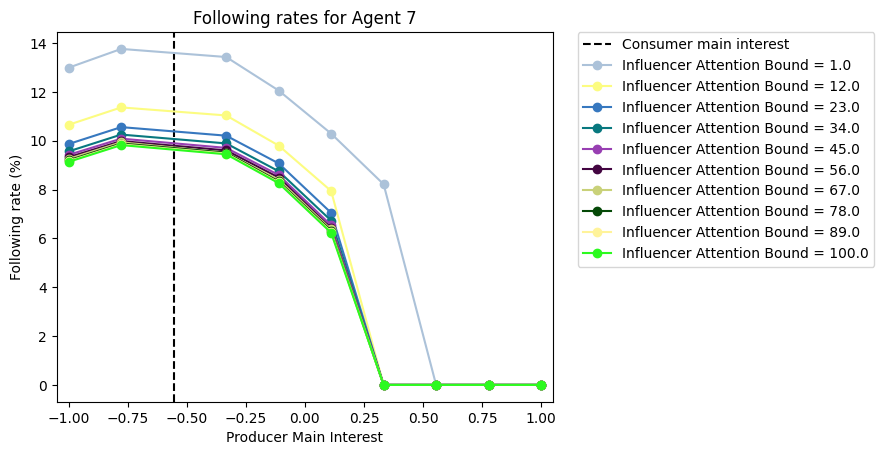

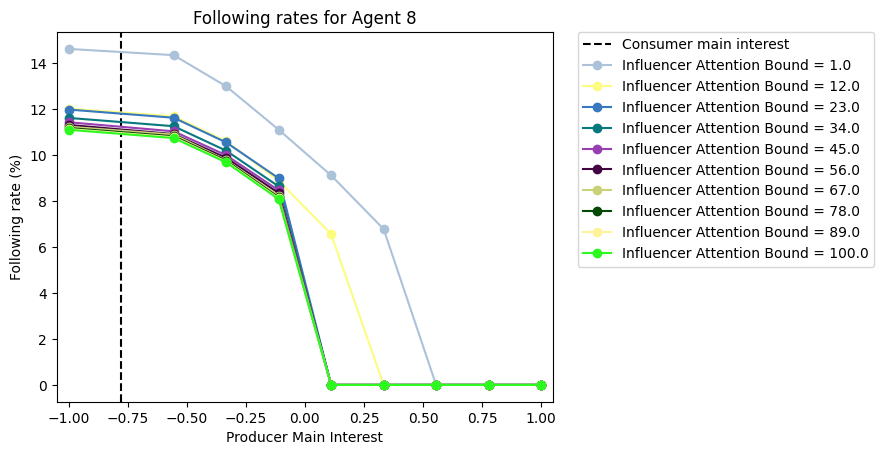

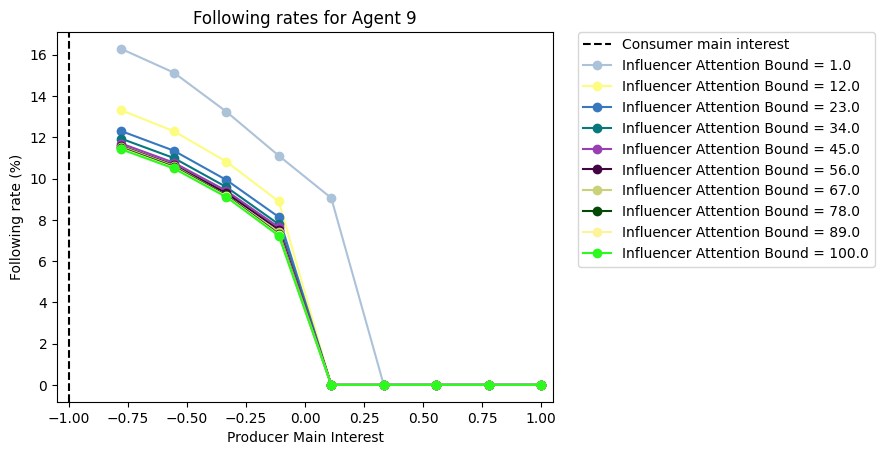

In [22]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

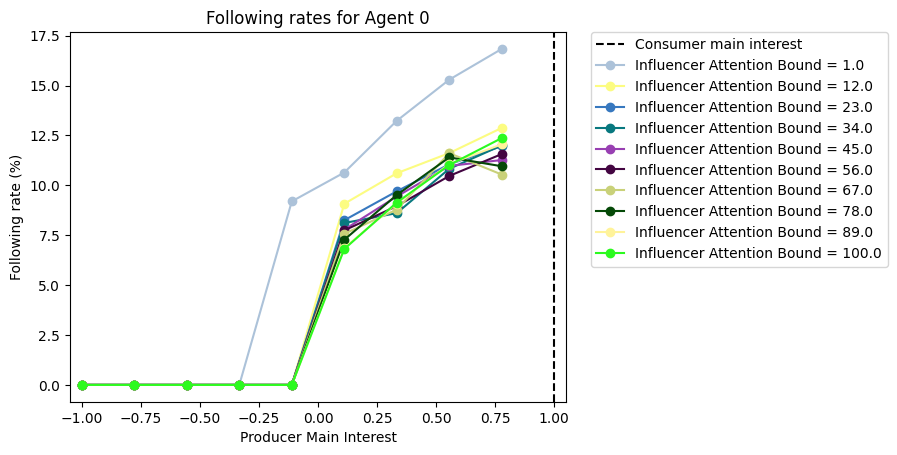

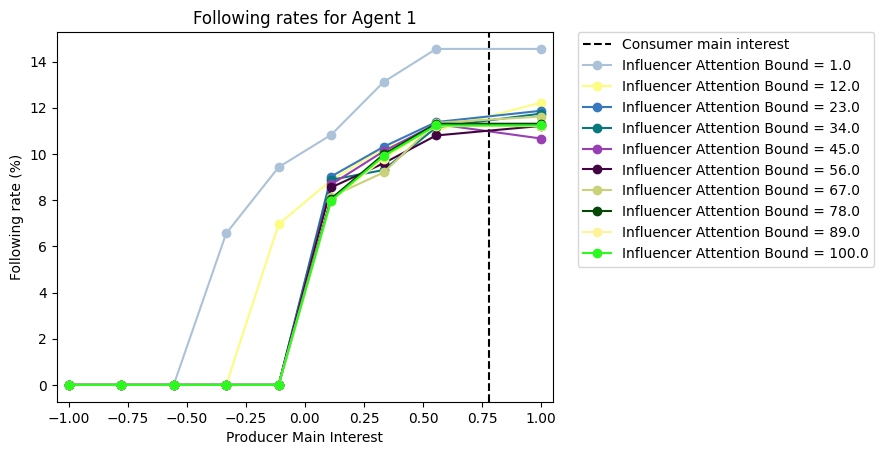

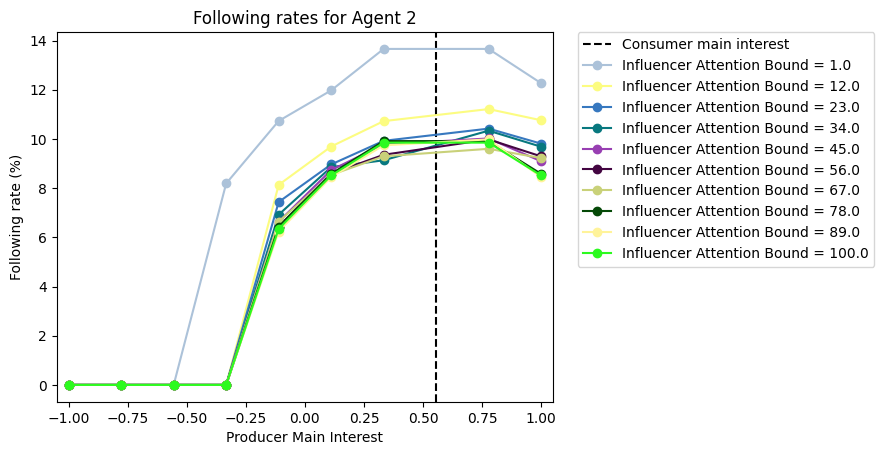

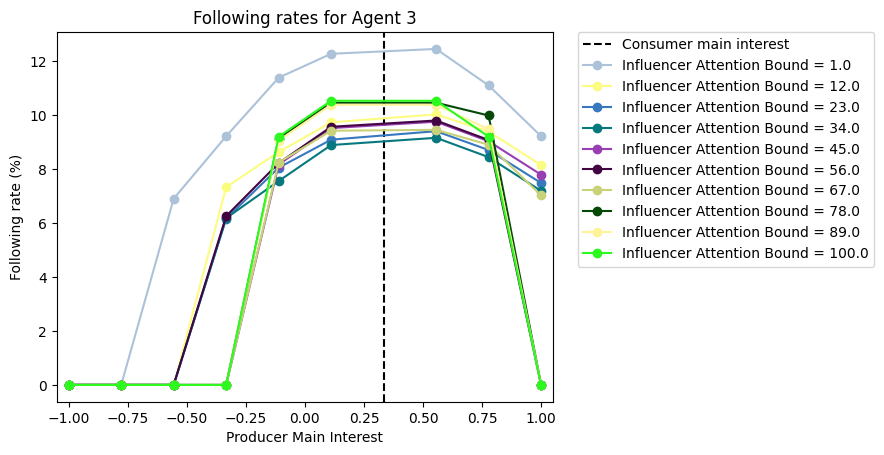

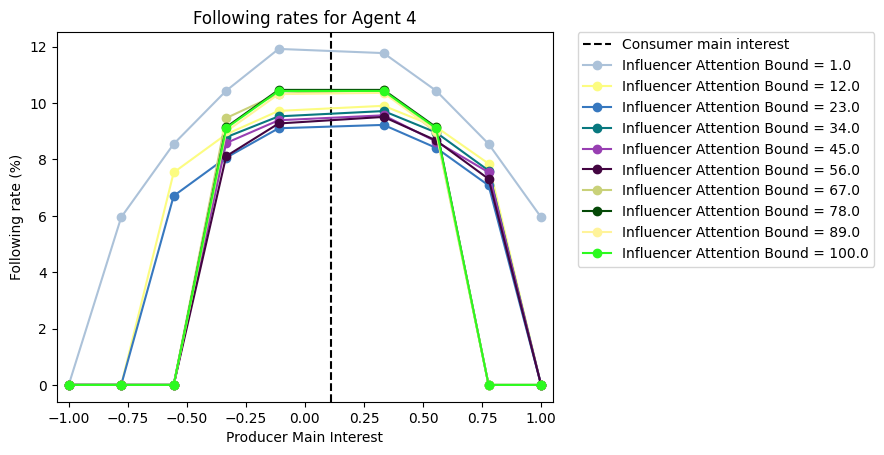

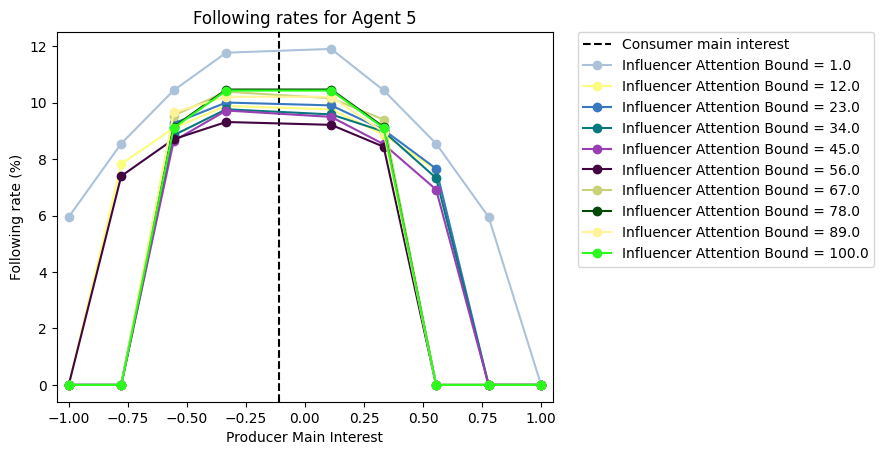

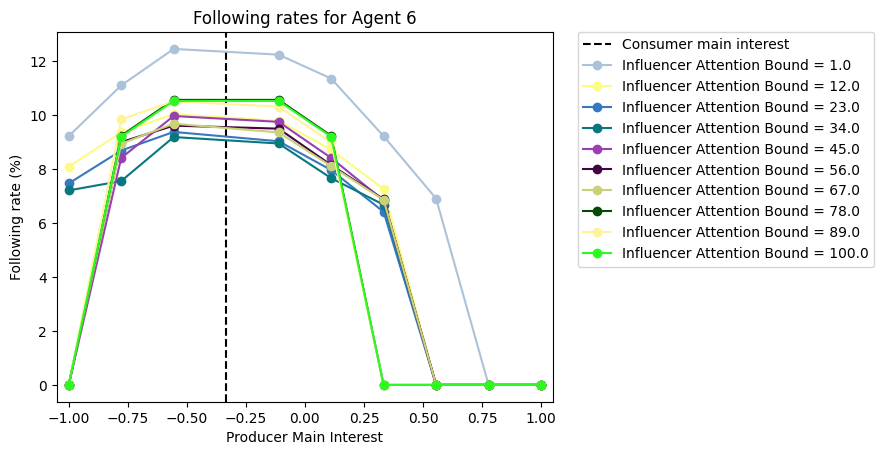

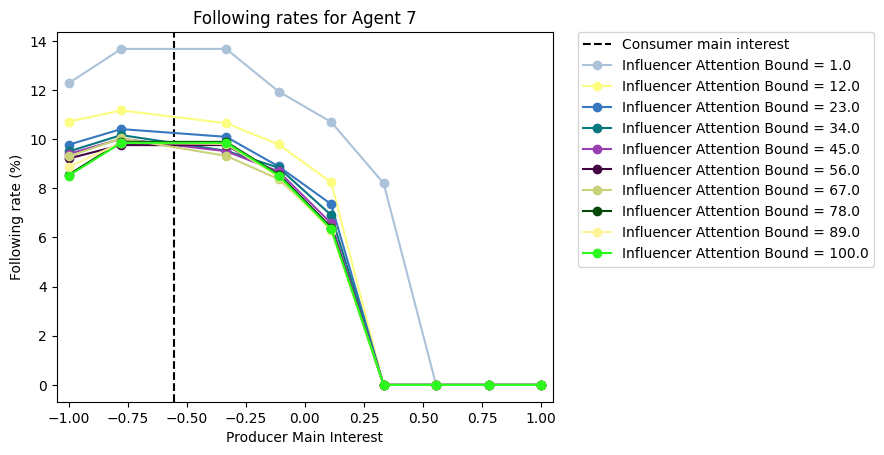

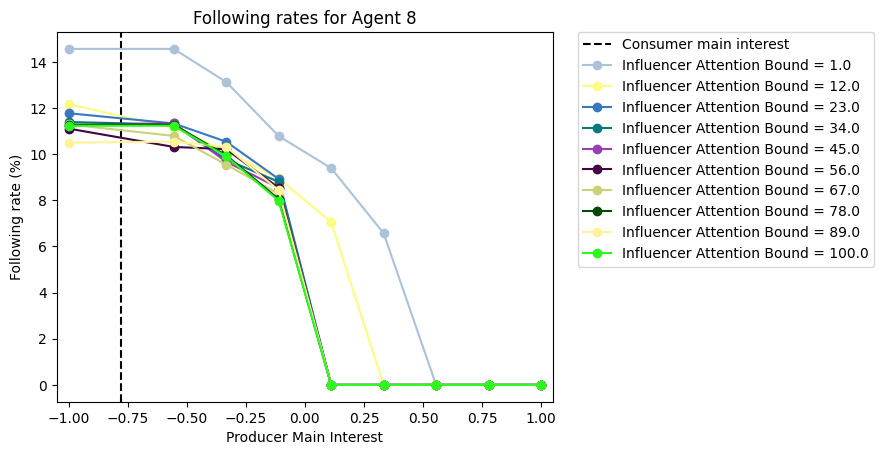

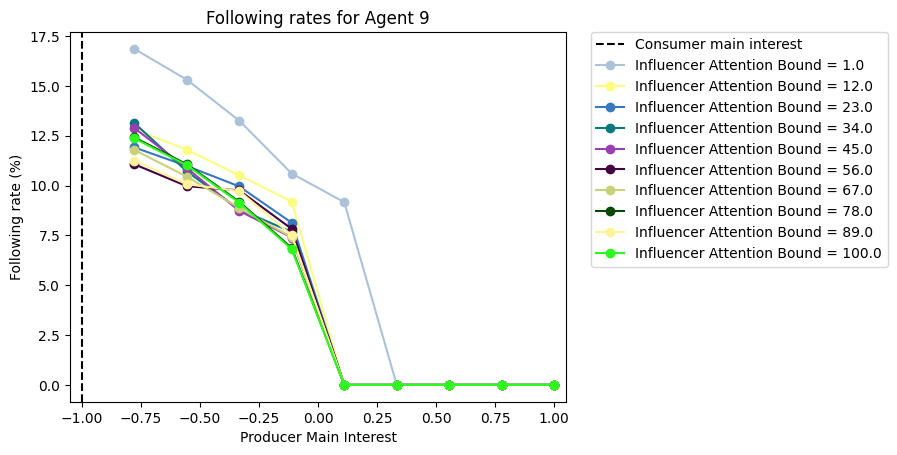

In [23]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

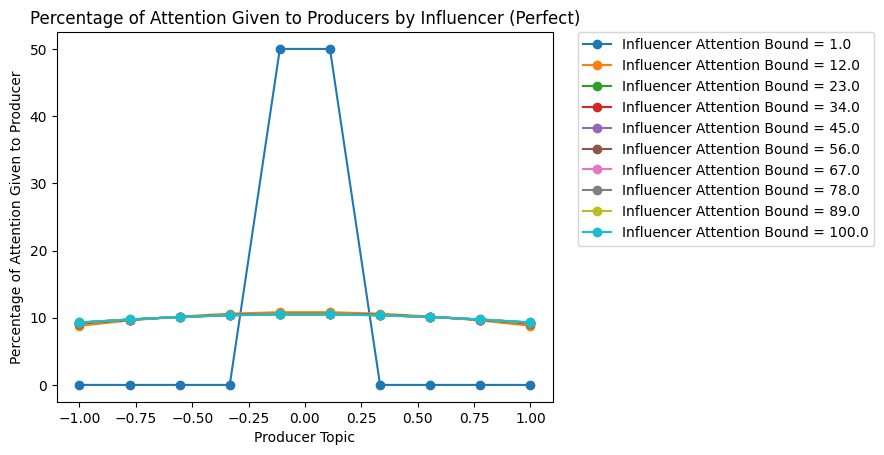

In [24]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

[5.02566849e-10 6.51893985e-10 8.89436165e-10 0.00000000e+00
 5.00000002e-01 4.99999994e-01 0.00000000e+00 8.89402028e-10
 6.51856422e-10 5.02649857e-10 0.00000000e+00 0.00000000e+00]
[1.05317762 1.15485578 1.22377263 1.27344284 1.29547284 1.29505496
 1.27333932 1.22447803 1.15491887 1.05148711 0.         0.        ]
[2.09822679 2.22951101 2.33372063 2.40337382 2.43624764 2.43269745
 2.4020058  2.33450448 2.23058936 2.09912302 0.         0.        ]
[3.13958777 3.31861893 3.46117899 3.54387671 3.59607373 3.59501004
 3.55531117 3.45584383 3.19332503 3.14117379 0.         0.        ]
[4.15945325 4.40154162 4.56950235 4.69257282 4.75224372 4.75146884
 4.69630729 4.56018553 4.24113024 4.17559433 0.         0.        ]
[5.18437342 5.45651159 5.66296978 5.81587222 5.88285183 5.88310359
 5.80092783 5.67086396 5.45869781 5.18382797 0.         0.        ]
[6.08075878 6.54891043 6.71615102 6.98098011 7.05103112 7.05543964
 6.98059174 6.81247677 6.54287997 6.2307804  0.         0.        ]
[6.900

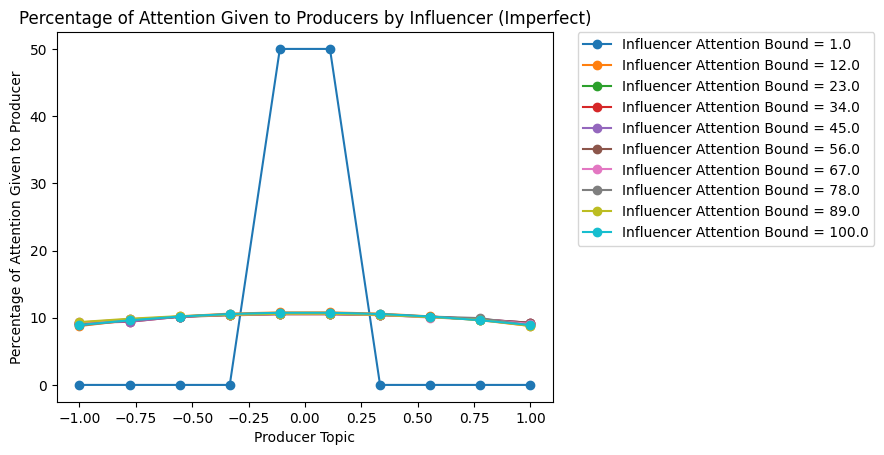

In [25]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(following_rates)
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [26]:
imperfect_info_stats[-4].influencer_stats[num_agents].following_rates[-1]

array([6.08075878, 6.54891043, 6.71615102, 6.98098011, 7.05103112,
       7.05543964, 6.98059174, 6.81247677, 6.54287997, 6.2307804 ,
       0.        , 0.        ])

[5.02566849e-10 6.51893985e-10 8.89436165e-10 0.00000000e+00
 5.00000002e-01 4.99999994e-01 0.00000000e+00 8.89402028e-10
 6.51856422e-10 5.02649857e-10] 0.19999999906668314
[5.02566849e-10 6.51893985e-10 8.89436165e-10 0.00000000e+00
 5.00000002e-01 4.99999994e-01 0.00000000e+00 8.89402028e-10
 6.51856422e-10 5.02649857e-10] 0.19999999906668314
[1.05534746 1.15124383 1.22161018 1.27285618 1.29894279 1.2989426
 1.27285627 1.22160983 1.15124372 1.05534715] 0.0881660369877693
[1.05317762 1.15485578 1.22377263 1.27344284 1.29547284 1.29505496
 1.27333932 1.22447803 1.15491887 1.05148711] 0.08818759825819096
[2.09918665 2.22796541 2.33160788 2.40293147 2.43830726 2.43830915
 2.40292966 2.3316097  2.22796503 2.0991878 ] 0.12348097540882615
[2.09822679 2.22951101 2.33372063 2.40337382 2.43624764 2.43269745
 2.4020058  2.33450448 2.23058936 2.09912302] 0.12265460707569853
[3.12824936 3.30528546 3.44510645 3.53830341 3.58305565 3.58305607
 3.53830359 3.44510604 3.30528421 3.12824976] 0.1658258

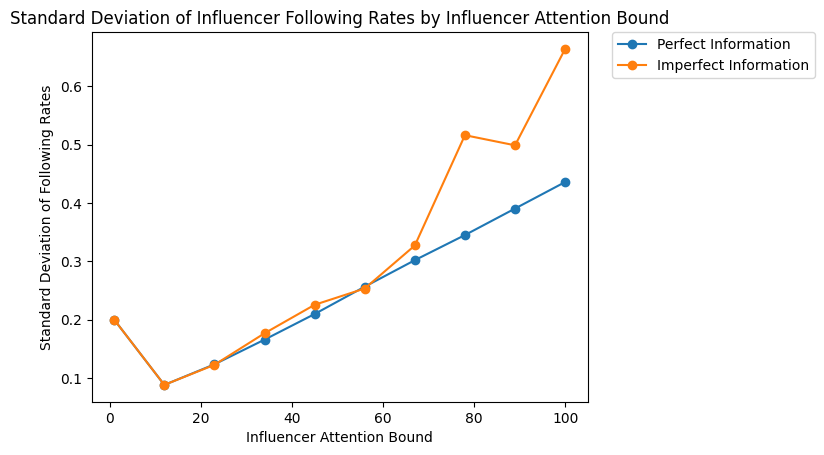

In [27]:
perfect_following_rate_std_devs = []
imperfect_following_rate_std_devs = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perfect_following_rates = perfect_influencer_stat.following_rates[-1][:num_agents]
    perfect_following_rates_std_dev = np.std(perfect_following_rates)
    print(perfect_following_rates, perfect_following_rates_std_dev)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperfect_following_rates = imperfect_influencer_stat.following_rates[-1][:num_agents]
    imperfect_following_rates_std_dev = np.std(imperfect_following_rates)
    print(imperfect_following_rates, imperfect_following_rates_std_dev)

    perfect_following_rate_std_devs.append(perfect_following_rates_std_dev)
    imperfect_following_rate_std_devs.append(imperfect_following_rates_std_dev)

plt.figure()
plt.title(f"Standard Deviation of Influencer Following Rates by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Standard Deviation of Following Rates")
plt.plot(varied_param_values, perfect_following_rate_std_devs, label="Perfect Information", marker='o')
plt.plot(varied_param_values, imperfect_following_rate_std_devs, label="Imperfect Information", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

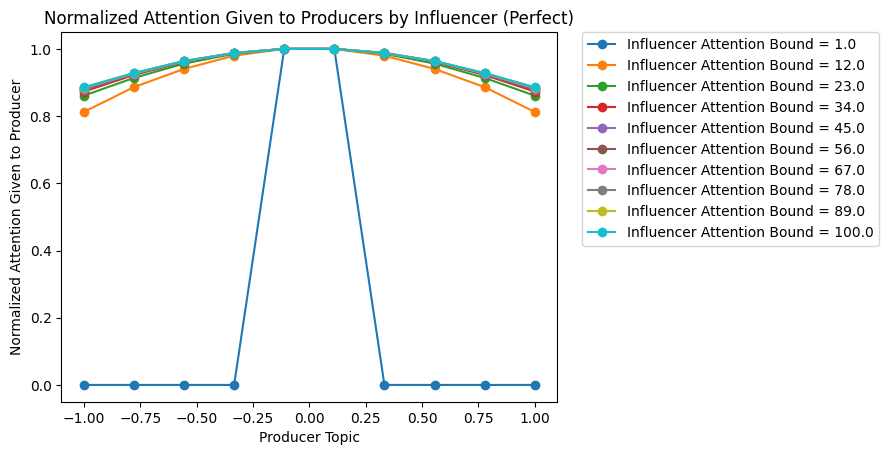

In [28]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

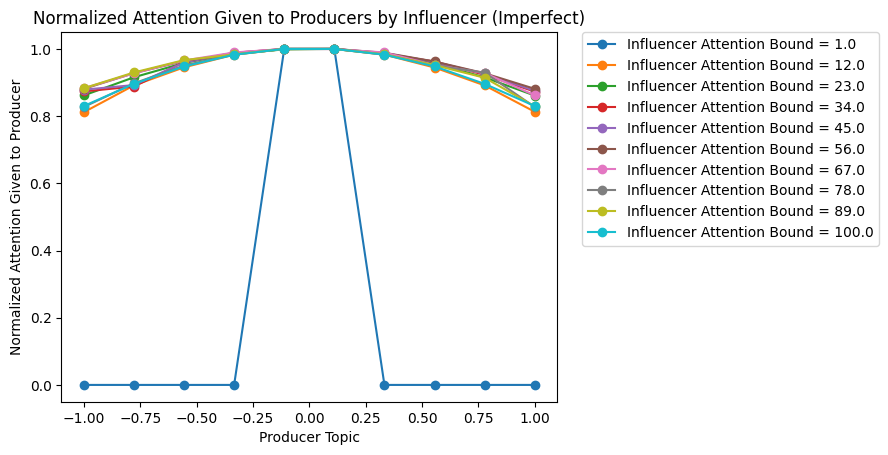

In [29]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

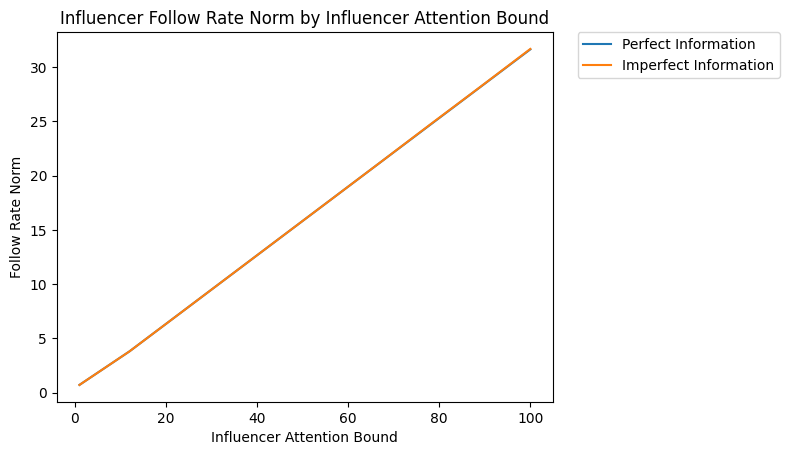

In [30]:
perf_norms = []
imperf_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(varied_param_values, perf_norms, label='Perfect Information')
plt.plot(varied_param_values, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

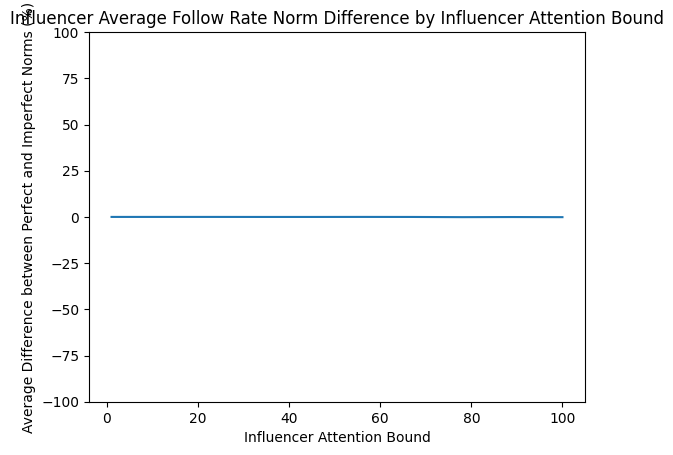

In [31]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

1.0
0.9999970024474479
0.9999994363225386
0.9999395500120166
0.9999462142270792
0.9999989754415326
0.9999713689537669
0.999715515023239
0.9998403023644131
0.9997406056109296


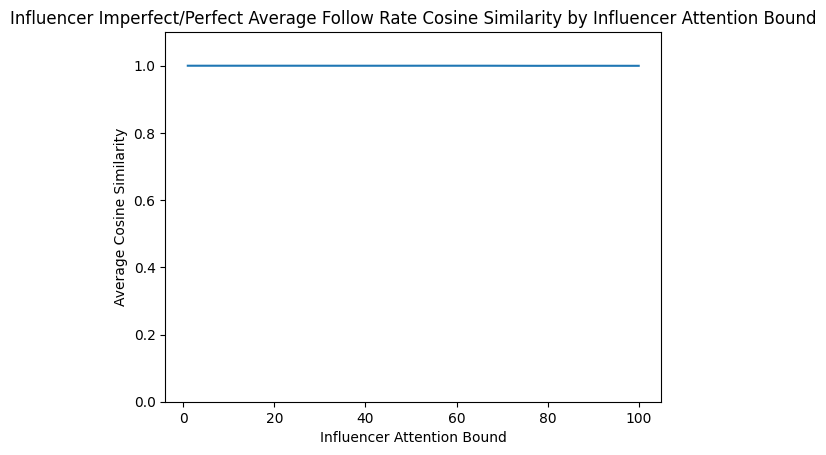

In [32]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
    cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    cosine_similarities.append(cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

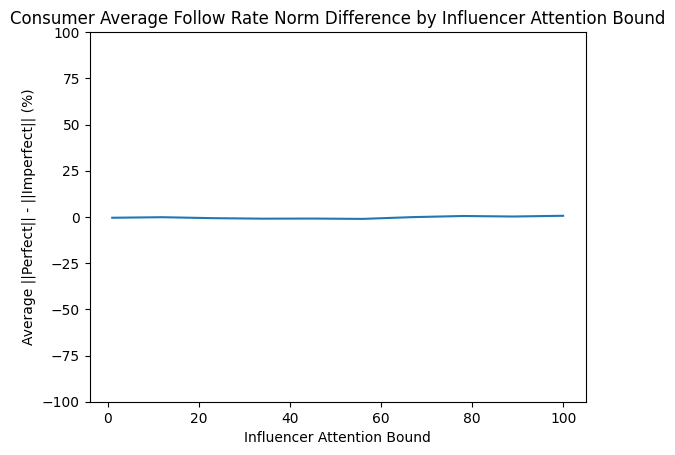

In [33]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average ||Perfect|| - ||Imperfect|| (%)")
plt.ylim(-100, 100)
plt.show()

[0.9995161616716526, 0.9998347122429484, 0.9984841442702914, 0.9974505407116796, 0.9951210017983001, 0.9931871633354771, 0.9973543995908735, 0.9997974594089415, 0.9998721648606758, 0.9997401865320767]


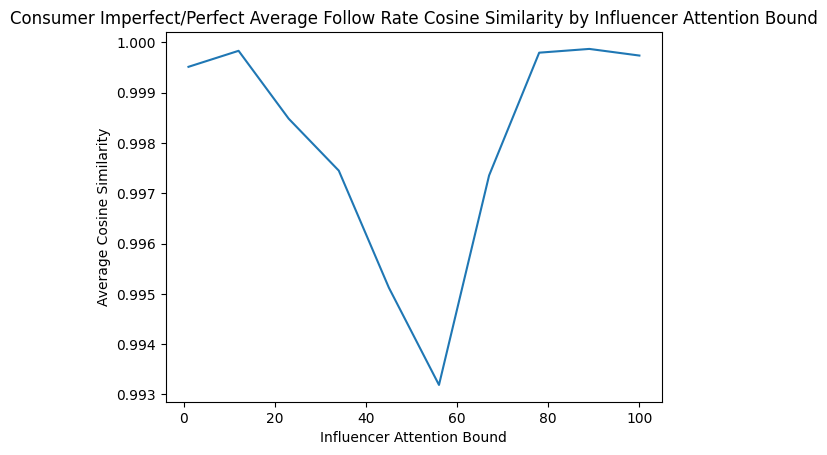

In [34]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
print(cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.show()

In [35]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 41.17898320413955, 41.416000110751554, 41.43098923312319], 'total_producer_utility': [0, 19.773673186616755, 20.093336853768452, 20.098655747813247], 'total_influencer_utility': [0, 0.0, 0.0, 0.0], 'total_social_welfare': [0, 41.17898320413955, 41.416000110751554, 41.43098923312319], 'average_consumer_rate_change': [0, 2.8086042653185297, 0.20272841257489396, 0.12504746320351576], 'average_producer_topic_change': [0, 0.1646776439292313, 0.0889753585648011, 0.008890220191669063], 'average_influencer_rate_change': [0, 0.6324555290822689, 0.0, 0.0], 'average_consumer_utility_change': [0, 4.117898320413954, 0.02370169066120087, 0.0014989122371642516], 'average_producer_utility_change': [0, 1.9773673186616754, 0.031966366715169614, 0.0005318894044795686], 'average_influencer_utility_change': [0, 0.0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 3.7212273676228587, 3.851668829570074, 3.842406492083417], 'utility_change': [0, 3.7212273

In [36]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 41.16943860747962, 41.17150610383905], 'total_producer_utility': [0, 0.27067056450023563, 0.27067056450023563], 'total_influencer_utility': [0, 0.0, 0.0], 'total_social_welfare': [0, 41.16943860747962, 41.17150610383905], 'average_consumer_rate_change': [0, 2.8086042653185297, 0.04029891297738454], 'average_producer_topic_change': [0, 0.0078022218058719905, 0.0], 'average_influencer_rate_change': [0, 0.6324555290822689, 0.0], 'average_consumer_utility_change': [0, 4.116943860747963, 0.0002067496359438259], 'average_producer_utility_change': [0, 0.027067056450023563, 0.0], 'average_influencer_utility_change': [0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 3.9032397759843804, 3.903514831400855], 'utility_change': [0, 3.9032397759843804, 0.0002750554164747676], 'optimization_times': [0.07247249997453764, 0.00937479198910296], 'following_rates': [array([0.        , 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091,